In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
result = []
for i in range(2, 20,2):
    print(i)
    # df = pd.read_csv("dk_learn_runningtime_workers_{num}.csv".format(num = i))
    # df = pd.read_csv("dk_learn_runningtime_workers_{num}_cv_3_03282017.csv".format(num = i))
    for j in range(9,10):
        print(j)
        df = []
        df = pd.read_csv("dk_learn_runningtime_workers_{num}_cv_3_sample_{s}_04032017.csv".format(num = i,s = j))
        result.append(df)

2
9
4
9
6
9
8
9
10
9
12
9
14
9
16
9
18
9


In [36]:
res_df = pd.concat(result)
res_df


,Unnamed: 0,model,cv,time,n_workers,n_graph,sample
0,0,DecisionTreeClassifier,3,685.121679,2,3657,9
1,1,DecisionTreeClassifier,3,680.004194,2,3657,9
2,2,DecisionTreeClassifier,3,680.030294,2,3657,9
3,3,DecisionTreeClassifier,3,680.583406,2,3657,9
4,4,DecisionTreeClassifier,3,679.801163,2,3657,9
5,5,DecisionTreeClassifier,3,677.113701,2,3657,9
6,6,DecisionTreeClassifier,3,699.833077,2,3657,9
7,7,DecisionTreeClassifier,3,677.639883,2,3657,9
8,8,DecisionTreeClassifier,3,677.224327,2,3657,9
9,9,DecisionTreeClassifier,3,680.722163,2,3657,9


In [46]:
res_df = res_df.drop_duplicates(['model', 'cv', 'n_workers', 'sample'])
df_gp = res_df[['cv','n_workers', 'time']].groupby(['cv','n_workers']).mean().reset_index()

In [47]:
df = df_gp
df[:2]

,cv,n_workers,time
0,3,2,685.121679
1,3,4,435.564100


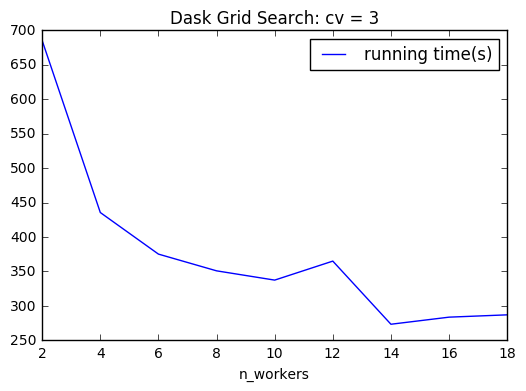

In [48]:
%matplotlib inline
plot_res = df[['time', 'n_workers']].plot(
    x = 'n_workers', y = 'time', kind='line', 
    label = "running time(s)", title = "Dask Grid Search: cv = 3")
plt.savefig('dask-grid-searh-cv-3-04.png')